# Cancer Dataset
### In this project i want to mess around with this classic dataset with breast cancer

In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [33]:
breast_cancer_data = load_breast_cancer()
print(breast_cancer_data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

# Data exploration

In [34]:
df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
df['target'] = breast_cancer_data.target

# Summary statistics
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

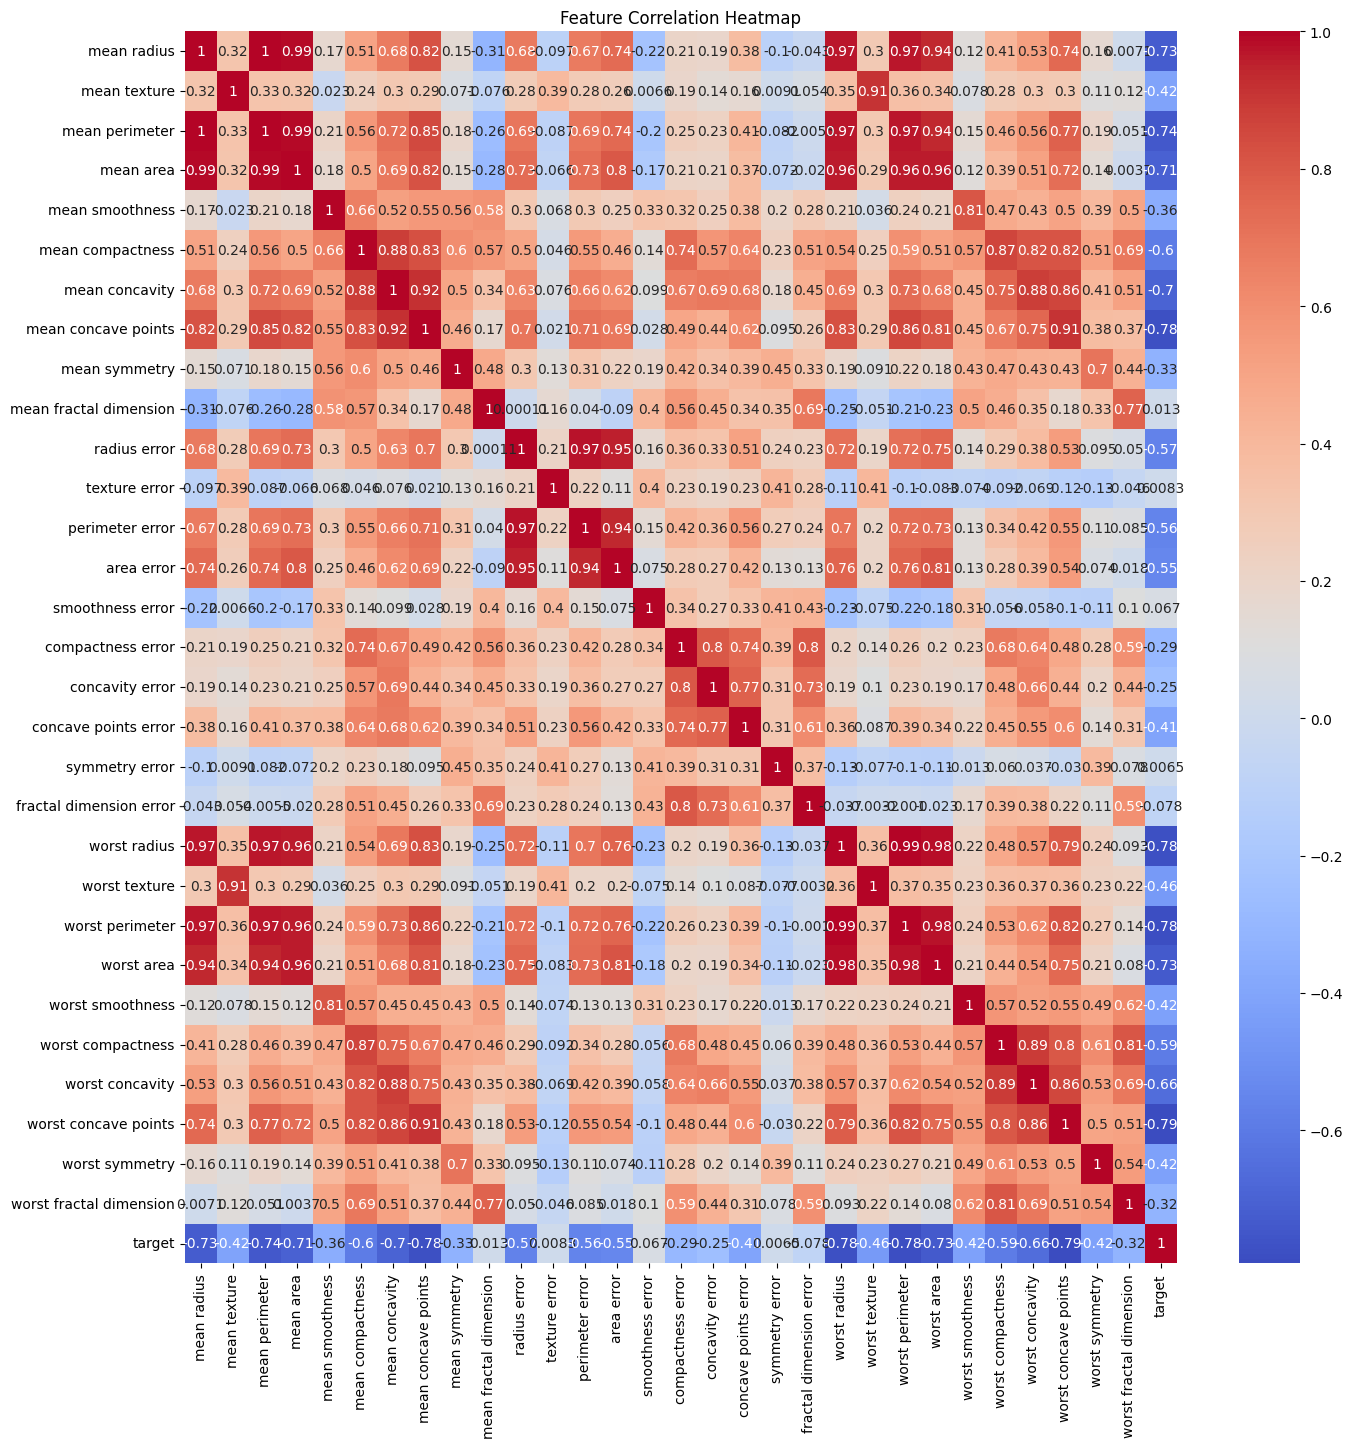

In [35]:
# Correlation heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

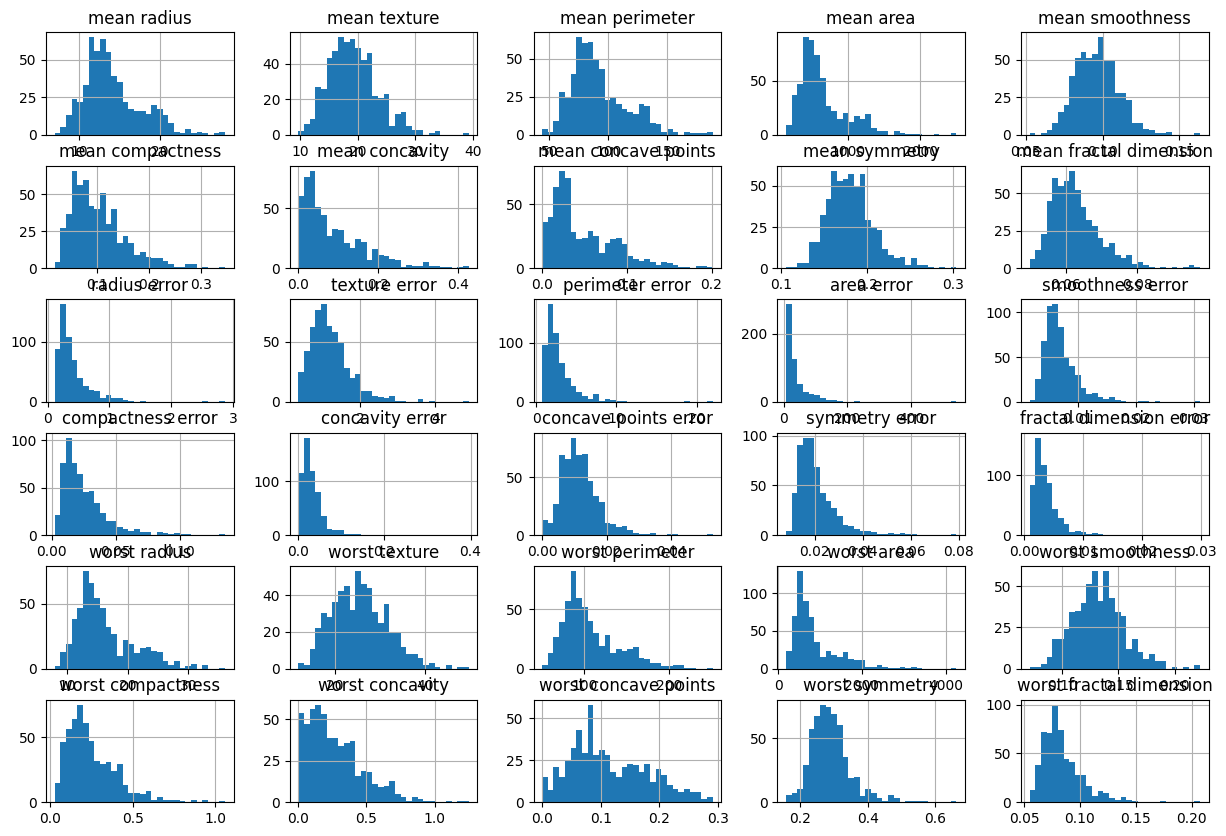

In [36]:
# Distribution plots
df.drop('target', axis=1).hist(bins=30, figsize=(15, 10))
plt.show()

# Modeling 

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'), df['target'], test_size=0.2, random_state=100)

training_data = X_train
validation_data = X_test
training_labels = y_train
validation_labels = y_test

print(training_data.shape)

print(training_labels.shape)

(455, 30)
(455,)


### KNeighborsClassifier without PCA

0.9473684210526315


0.9649122807017544


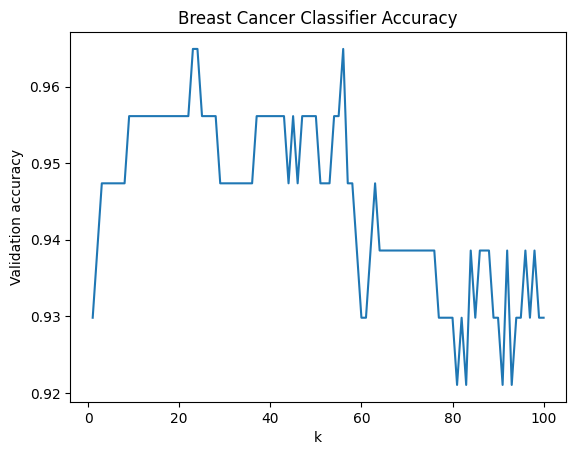

In [38]:
model = KNeighborsClassifier(n_neighbors = 3)

model.fit(training_data, training_labels)

print(model.score(validation_data, validation_labels))


k_scores = []
k_list = range(1, 101)
for k in k_list:
  
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(training_data, training_labels)
  q = classifier.score(validation_data, validation_labels)
  k_scores.append(q)

print(max(k_scores))


plt.plot(k_list, k_scores)
plt.xlabel('k')
plt.ylabel('Validation accuracy')
plt.title('Breast Cancer Classifier Accuracy')
plt.show()

In [39]:
# Best k 
print(f"Best k: {k_scores.index(max(k_scores)) + 1}")

Best k: 23


### Scaling and using PCA()

In [41]:
# Scaling Data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.fit_transform(X_test)

### PCA for training set

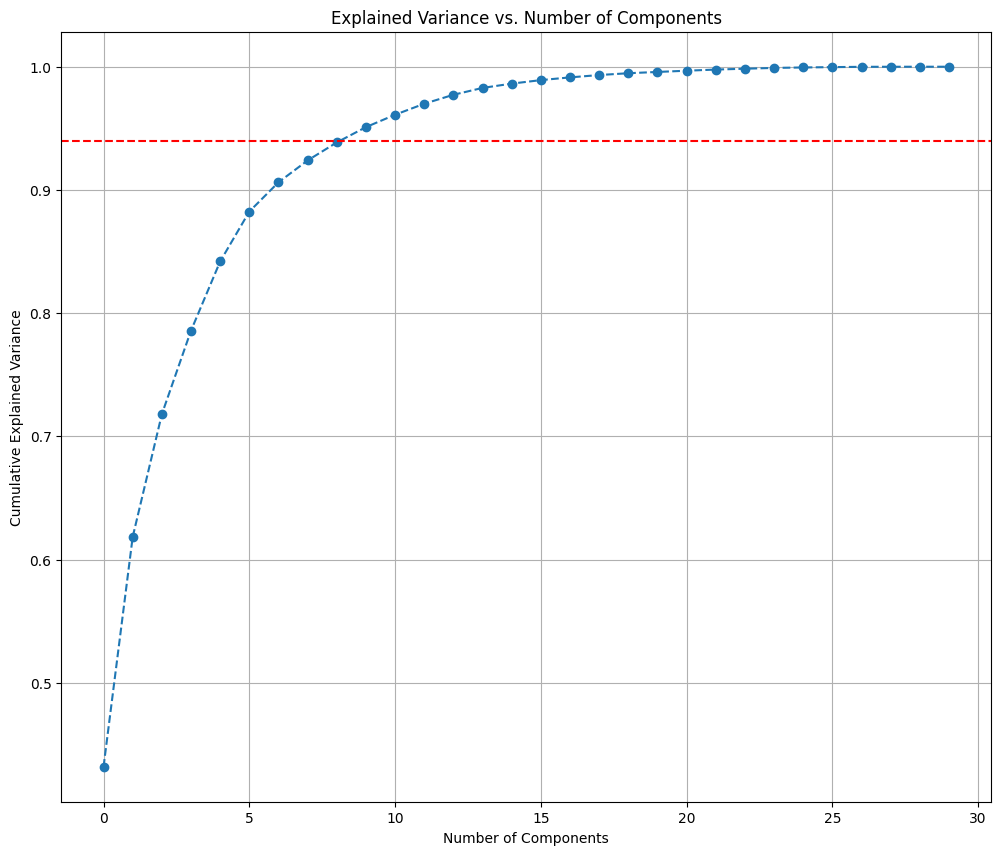

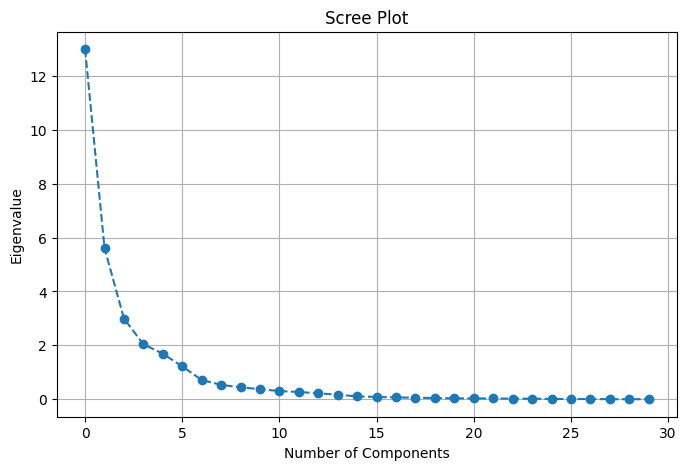

Number of components to capture 94.0% of variance: 10
Number of components selected automatically: 7


In [42]:
# Apply PCA
pca = PCA()
pca.fit(X_train_scaled)

# Cumulative explained variance plot
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(12, 10))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.axhline(y=0.94, color='r', linestyle='--')  # 90% variance threshold
plt.show()

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(pca.explained_variance_, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Determine the number of components to capture 90% of the variance
threshold = 0.94
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1
print(f"Number of components to capture {threshold*100}% of variance: {num_components}")

# Automatically determine number of components
pca = PCA(n_components=0.90)
z = pca.fit_transform(X_train_scaled)
print(f"Number of components selected automatically: {pca.n_components_}")


### PCA for test set

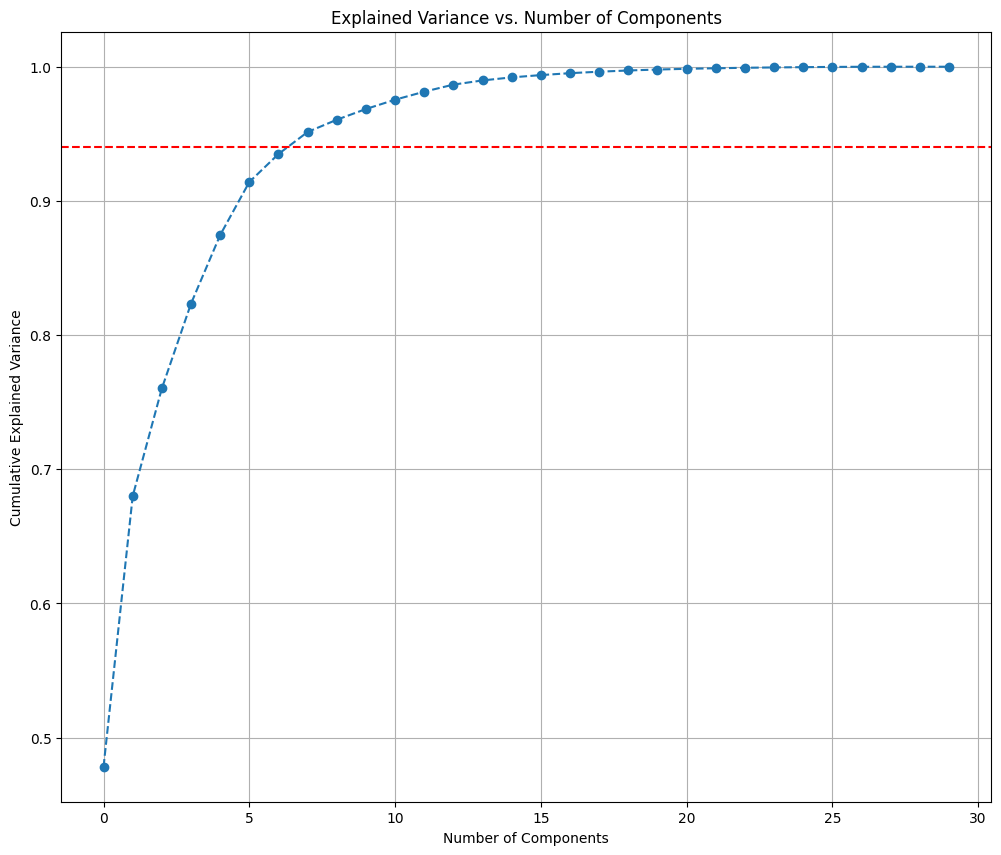

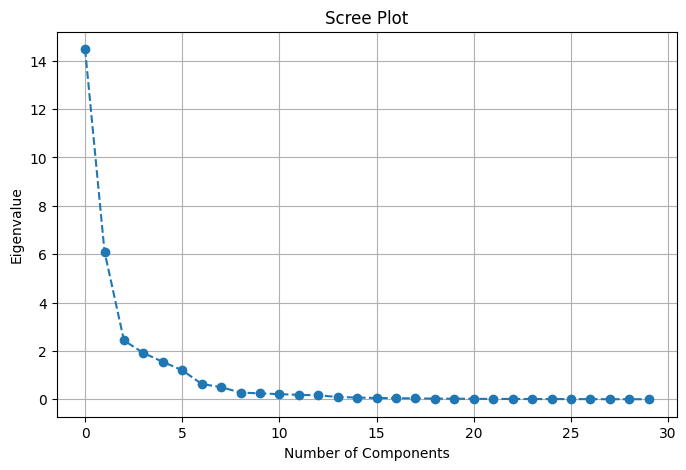

Number of components to capture 94.0% of variance: 8
Number of components selected automatically: 30


In [43]:
pca_test = PCA()
pca_test.fit(X_test_scaled)

# Cumulative explained variance plot
cumulative_explained_variance = np.cumsum(pca_test.explained_variance_ratio_)
plt.figure(figsize=(12, 10))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.axhline(y=0.94, color='r', linestyle='--')  # 90% variance threshold
plt.show()

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(pca_test.explained_variance_, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Determine the number of components to capture 90% of the variance
threshold = 0.94
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1
print(f"Number of components to capture {threshold*100}% of variance: {num_components}")

# Automatically determine number of components
pca = PCA(n_components=0.90)
m = pca.fit_transform(X_test_scaled)
print(f"Number of components selected automatically: {pca_test.n_components_}")

In [44]:
#Using PCA on train dataset

pca = PCA(n_components=10)

X_train_pca = pca.fit_transform(X_train_scaled)

In [45]:
#Using PCA on test dataset

pca = PCA(n_components=10)
X_test_pca = pca.fit_transform(X_test_scaled)


In [46]:
#Cross-validation
#Use it for score accuracy_score, precision_score, recall_score, f1_score

cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), X_train_pca, y_train, cv=5)
print(f'Cross-Validation Accuracy: {cv_scores.mean():.4f}')

Cross-Validation Accuracy: 0.9560


In [47]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_pca, y_train)
print(f'Logistic Regression Accuracy: {log_reg.score(X_test_pca, y_test):.4f}')

Logistic Regression Accuracy: 0.9386


In [48]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_pca, y_train)
print(f'Random Forest Accuracy: {rf.score(X_test_pca, y_test):.4f}')

Random Forest Accuracy: 0.9386


In [ ]:
# Random Forest for feature importance
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
importances = rf.feature_importances_

# Plot feature importance
plt.barh(breast_cancer_data.feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

In [49]:
# Support Vector Machine
svm = SVC()
svm.fit(X_train_pca, y_train)
print(f'SVM Accuracy: {svm.score(X_test_pca, y_test):.4f}')

SVM Accuracy: 0.9123


In [50]:
#Knearrest Neighbors with GridSearch
param_grid = {'n_neighbors': np.arange(1, 31)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print(f'Best Parameters: {grid.best_params_}')
print(f'Best Cross-Validation Score: {grid.best_score_:.4f}')


Best Parameters: {'n_neighbors': 7}
Best Cross-Validation Score: 0.9670


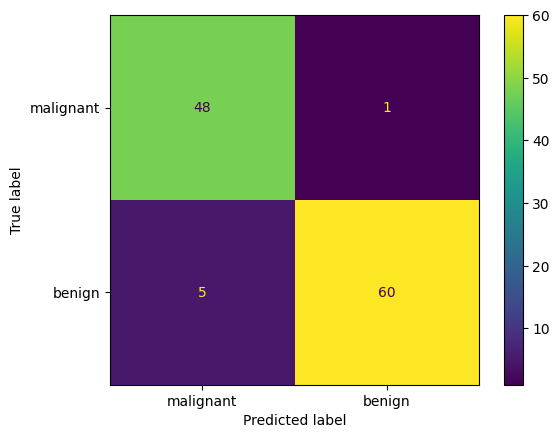

In [51]:
# Confusion Matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=breast_cancer_data.target_names).plot()
plt.show()

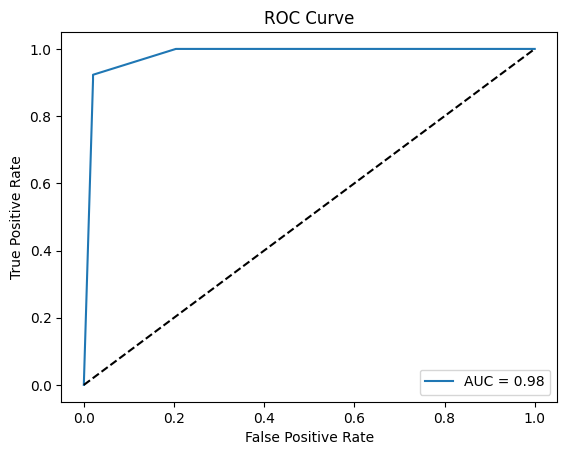

In [52]:
# ROC Curve

y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Accuracy: 0.9474
Precision: 0.9836
Recall: 0.9231
F1 Score: 0.9524
ROC AUC Score: 0.9818


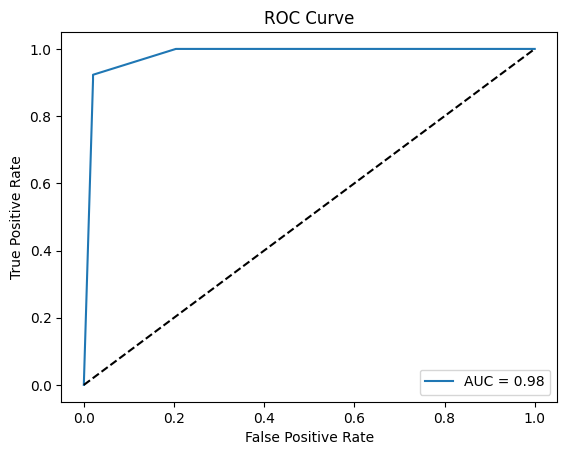

In [54]:
#Use it for score accuracy_score, precision_score, recall_score, f1_score

y_pred_kn = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_kn):.4f}')

print(f'Precision: {precision_score(y_test, y_pred_kn):.4f}')

print(f'Recall: {recall_score(y_test, y_pred_kn):.4f}')

print(f'F1 Score: {f1_score(y_test, y_pred_kn):.4f}')

#ROC AUC Score
y_proba_knn = model.predict_proba(X_test)[:, 1]
print(f'ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}')



#Create ROC Curve for KNN

fpr, tpr, thresholds = roc_curve(y_test, y_proba_knn)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.legend()

plt.show()


Accuracy: 0.9386
Precision: 0.9028
Recall: 1.0000
F1 Score: 0.9489
ROC AUC Score: 0.9818


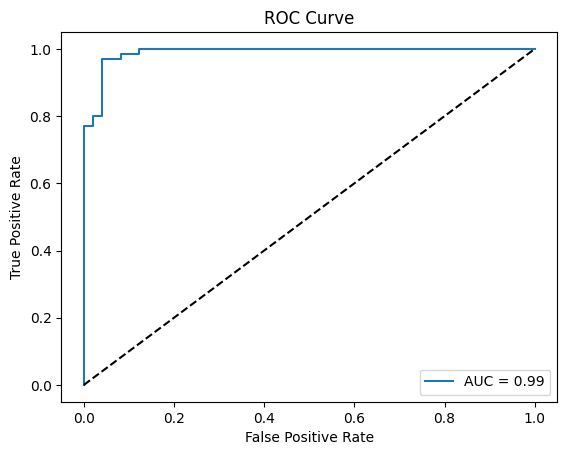

In [58]:
#Use it for score accuracy_score, precision_score, recall_score, f1_score

y_pred_log = log_reg.predict(X_test_pca)
print(f'Accuracy: {accuracy_score(y_test, y_pred_log):.4f}')

print(f'Precision: {precision_score(y_test, y_pred_log):.4f}')


print(f'Recall: {recall_score(y_test, y_pred_log):.4f}')

print(f'F1 Score: {f1_score(y_test, y_pred_log):.4f}')


#ROC AUC Score
y_proba_log = log_reg.predict_proba(X_test_pca)[:, 1]
print(f'ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}')



#Create ROC Curve for log

fpr, tpr, thresholds = roc_curve(y_test, y_proba_log)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.legend()

plt.show()

Accuracy: 0.9561
Precision: 0.9286
Recall: 1.0000
F1 Score: 0.9630
ROC AUC Score: 0.9818


c:\Programowanie\.vscode\.conda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


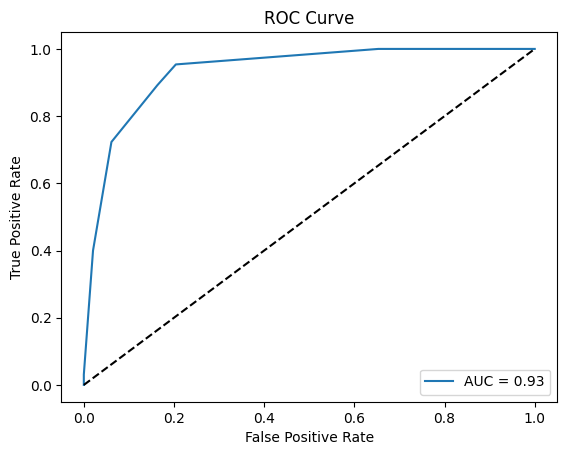

In [60]:
#Use it for score accuracy_score, precision_score, recall_score, f1_score

y_pred_rf = rf.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}')

print(f'Precision: {precision_score(y_test, y_pred_rf):.4f}')


print(f'Recall: {recall_score(y_test, y_pred_rf):.4f}')

print(f'F1 Score: {f1_score(y_test, y_pred_rf):.4f}')


#ROC AUC Score
y_proba_rf = rf.predict_proba(X_test)[:, 1]
print(f'ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}')



#Create ROC Curve for rfm

fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.legend()

plt.show()

Accuracy: 0.9123
Precision: 0.8767
Recall: 0.9846
F1 Score: 0.9275


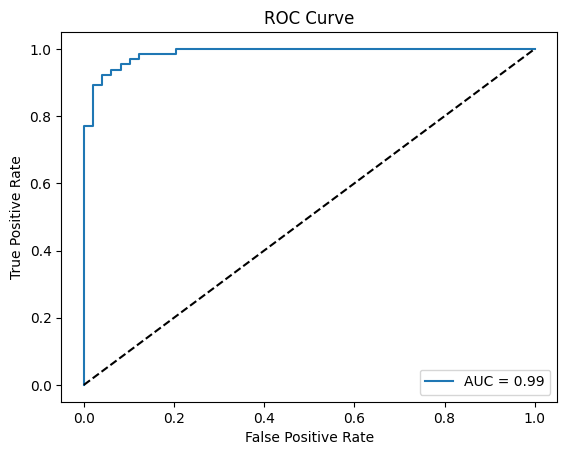

In [63]:
#Use it for score accuracy_score, precision_score, recall_score, f1_score

y_pred_svm = svm.predict(X_test_pca)
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}')

print(f'Precision: {precision_score(y_test, y_pred_svm):.4f}')


print(f'Recall: {recall_score(y_test, y_pred_svm):.4f}')

print(f'F1 Score: {f1_score(y_test, y_pred_svm):.4f}')




y_scores_svm = svm.decision_function(X_test_pca)
y_proba_svm = (y_scores_svm - y_scores_svm.min()) / (y_scores_svm.max() - y_scores_svm.min())


#Create ROC Curve for svm

fpr, tpr, thresholds = roc_curve(y_test, y_proba_svm)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.legend()

plt.show()


Accuracy: 0.9211
Precision: 0.8784
Recall: 1.0000
F1 Score: 0.9353


c:\Programowanie\.vscode\.conda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


ROC AUC Score: 0.5000


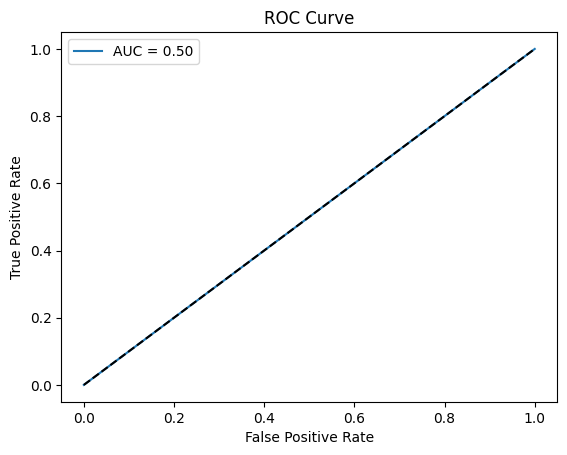

In [66]:
#Use it for score accuracy_score, precision_score, recall_score, f1_score

y_pred_log = grid.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, y_pred_log):.4f}')

print(f'Precision: {precision_score(y_test, y_pred_log):.4f}')


print(f'Recall: {recall_score(y_test, y_pred_log):.4f}')

print(f'F1 Score: {f1_score(y_test, y_pred_log):.4f}')


#ROC AUC Score
y_proba_grid = grid.predict_proba(X_test)[:, 1]
print(f'ROC AUC Score: {roc_auc_score(y_test, y_proba_grid):.4f}')


fpr, tpr, thresholds = roc_curve(y_test, y_proba_grid)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.legend()

plt.show()